# EDA(Explanatory Data Analysis)

Install and import the necessary libraries.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [4]:
data = pd.read_csv('data/winequality.csv')

In [5]:
data.head()

,Unnamed: 0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
0,0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,NaN
4,4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


Removing the "Unnamed: 0" and "index" columns.

In [6]:
data = data.drop(columns=['Unnamed: 0', 'index'])

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


Let's get the basic and descriptive information about the data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_y             1500 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


Let's convert the column that describes wine quality into a categorical one.

In [9]:
data["quality_y"] = data["quality_y"].astype("category")

Let's find the null values and remove them if necessary.

In [10]:
data.isnull().sum()

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality_y               99
dtype: int64

In [11]:
data = data.dropna(subset=['quality_y']).reset_index(drop=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1500 non-null   float64 
 1   volatile acidity      1500 non-null   float64 
 2   citric acid           1500 non-null   float64 
 3   residual sugar        1500 non-null   float64 
 4   chlorides             1500 non-null   float64 
 5   free sulfur dioxide   1500 non-null   float64 
 6   total sulfur dioxide  1500 non-null   float64 
 7   density               1500 non-null   float64 
 8   pH                    1500 non-null   float64 
 9   sulphates             1500 non-null   float64 
 10  alcohol               1500 non-null   float64 
 11  quality_y             1500 non-null   category
dtypes: category(1), float64(11)
memory usage: 130.7 KB


In [13]:
data.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00
mean,8.32,0.53,0.27,2.55,0.09,15.89,46.59,1.00,3.31,0.66,10.41
std,1.74,0.18,0.19,1.44,0.05,10.53,33.11,0.00,0.15,0.17,1.06
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40
25%,7.10,0.39,0.10,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.10
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.25,1.00,3.40,0.73,11.10
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90


In [14]:
print("Skewness: \n", (data.select_dtypes(include=['number']).drop(columns=['quality_y'], errors='ignore')).skew())
print("\nKurtosis: \n", (data.select_dtypes(include=['number']).drop(columns=['quality_y'], errors='ignore')).kurt())

Skewness: 
 fixed acidity           0.972922
volatile acidity        0.687504
citric acid             0.321634
residual sugar          4.470951
chlorides               5.738208
free sulfur dioxide     1.270970
total sulfur dioxide    1.525546
density                 0.071746
pH                      0.226944
sulphates               2.433030
alcohol                 0.863864
dtype: float64

Kurtosis: 
 fixed acidity            1.068551
volatile acidity         1.293328
citric acid             -0.760951
residual sugar          27.496728
chlorides               42.513952
free sulfur dioxide      2.099517
total sulfur dioxide     3.874339
density                  0.947544
pH                       0.856994
sulphates               11.885413
alcohol                  0.220194
dtype: float64


The data shows that some features, particularly "chlorides," "residual sugar," and "sulphates," have high skewness and kurtosis, indicating that they are significantly skewed and contain outliers. Additionally, the "density" and "pH" indicators are close to a normal distribution, as their skewness and kurtosis values are low.

I will visualize each feature using a histogram and a box plot.

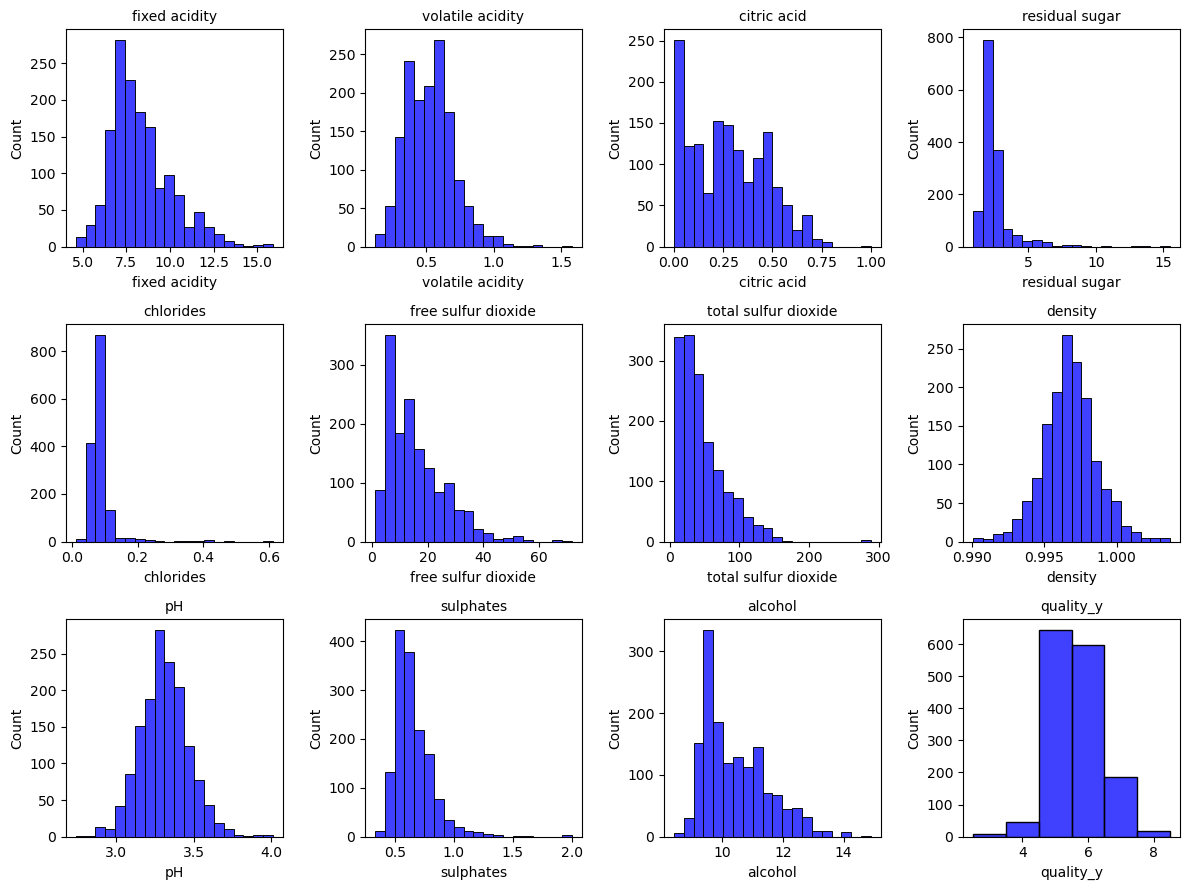

In [15]:
number_of_columns = 4
number_of_rows = math.ceil(len(data.columns) / number_of_columns)
plt.figure(figsize=(number_of_columns * 3, number_of_rows * 3))
for i, col in enumerate(data.columns):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.histplot(data[col], bins=20, kde=False, color='blue')
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

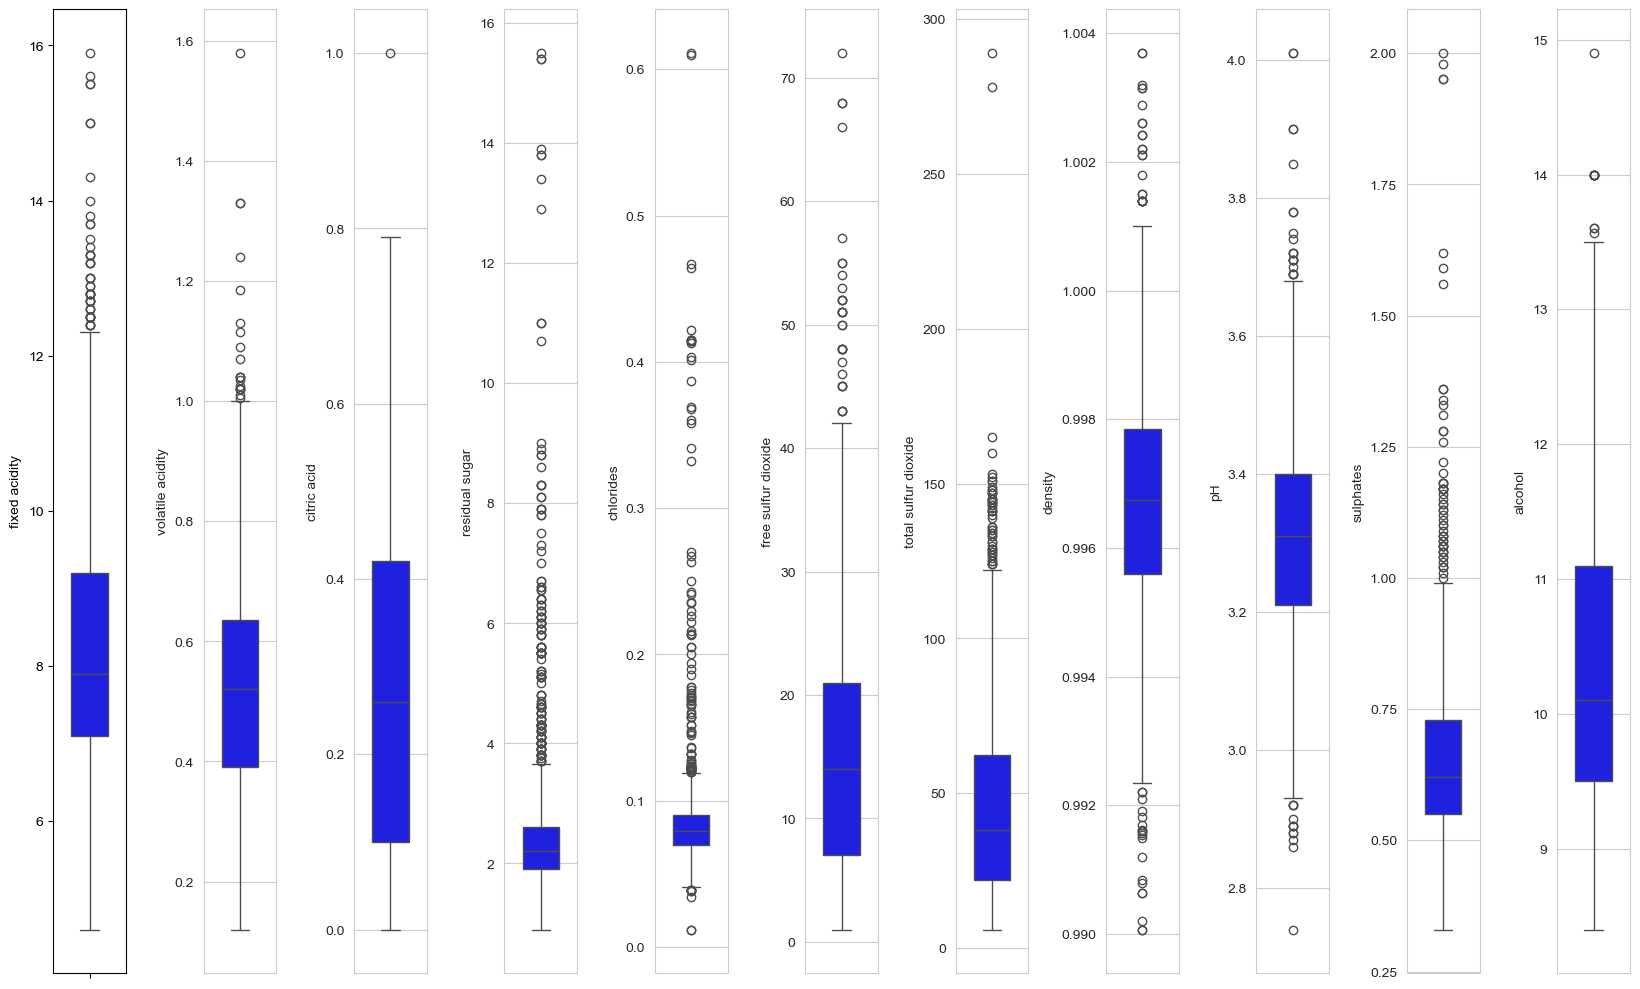

In [16]:
l = [col for col in data.columns if col != "quality_y"]
number_of_columns = len(l)
number_of_rows = 1
plt.figure(figsize=(number_of_columns * 1.5, 10))
for i in range(len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(y=data[l[i]], color='blue', width=0.5)
plt.tight_layout()
plt.show()

I will identify and display the outliers and extreme outliers.

Extreme Outliers. Extreme outliers are data points that are more extreme than Q1 - 3 * IQR or Q3 + 3 * IQR. Extreme outliers are marked with an asterisk on the boxplot. Mild outliers are data points that are more extreme than than Q1 - 1.5 * IQR or Q3 + 1.5 * IQR, but are not extreme outliers.

In [17]:
outliers_count_dict = {}
for column in data.select_dtypes(include=['float64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    outliers_count_dict[column] = outliers.shape[0]

In [18]:
for column, count in outliers_count_dict.items():
    print(f"Number of outliers in {column}: {count}")

Number of outliers in fixed acidity: 46
Number of outliers in volatile acidity: 20
Number of outliers in citric acid: 1
Number of outliers in residual sugar: 150
Number of outliers in chlorides: 107
Number of outliers in free sulfur dioxide: 30
Number of outliers in total sulfur dioxide: 52
Number of outliers in density: 43
Number of outliers in pH: 33
Number of outliers in sulphates: 56
Number of outliers in alcohol: 11


In [19]:
extreme_outliers_count_dict = {}
for column in data.select_dtypes(include=['float64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    extreme_outliers = data[(data[column] < (Q1 - 3 * IQR)) | (data[column] > (Q3 + 3 * IQR))]
    extreme_outliers_count_dict[column] = extreme_outliers.shape[0]

In [20]:
for column, count in extreme_outliers_count_dict.items():
    print(f"Number of extreme outliers in {column}: {count}")

Number of extreme outliers in fixed acidity: 4
Number of extreme outliers in volatile acidity: 1
Number of extreme outliers in citric acid: 0
Number of extreme outliers in residual sugar: 86
Number of extreme outliers in chlorides: 63
Number of extreme outliers in free sulfur dioxide: 4
Number of extreme outliers in total sulfur dioxide: 2
Number of extreme outliers in density: 0
Number of extreme outliers in pH: 2
Number of extreme outliers in sulphates: 14
Number of extreme outliers in alcohol: 0


By analyzing the outliers and extreme outliers, we observe that the skewed values are mainly in the "residual sugar" and "chlorides" columns, which are related to their varying concentrations in different wines.

Constructing a correlation matrix that shows the linear relationships between the variables.

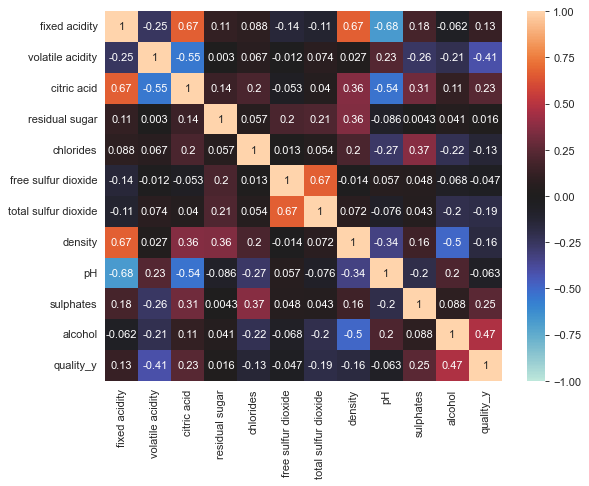

In [24]:
data = data.apply(pd.to_numeric, errors='coerce')
corr = data.corr()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=corr)

The correlation matrix reveals a relatively strong positive linear relationship between "fixed acidity" and "density" as well as between "total sulfur dioxide" and "free sulfur dioxide." On the other hand, there is a relatively strong negative linear relationship between "alcohol" and "density," "pH" and "fixed acidity," and "pH" and "citric acid."

**Conclusion:**
During the analysis, I removed the null values, while keeping the outliers unchanged, assuming that they do not significantly impact the data.

To better understand the impact of outliers, we can evaluate their effect on different models by testing models both with and without the outliers. Additionally, we can explore the causes of these outliers (such as measurement errors or natural variability).